In [12]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)
n = 100

# Ad budgets (choose realistic ranges)
TV        = rng.uniform(0, 300,  n)   # $0–$300k
Radio     = rng.uniform(0, 50,   n)   # $0–$50k
Newspaper = rng.uniform(0, 80,   n)   # $0–$80k

# Intercept + 0.045*TV + 0.19*Radio + 0.015*Newspaper + noise
noise = rng.normal(0, 2.0, n)  # small noise
Sales = 3 + 0.045*TV + 0.19*Radio + 0.015*Newspaper + noise

# Ensure no negative sales
Sales = np.clip(Sales, 0, None)

df = pd.DataFrame({
    'TV': TV.round(2),
    'Radio': Radio.round(2),
    'Newspaper': Newspaper.round(2),
    'Sales': Sales.round(2)
})

df.to_csv('/content/advertising_sales_100.csv', index=False)
df.head()

,TV,Radio,Newspaper,Sales
0,232.19,45.43,62.19,22.43
1,131.66,34.99,77.75,16.53
2,257.58,13.29,40.06,17.21
3,209.21,48.46,11.51,22.10
4,28.25,38.94,1.11,14.63


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('/content/advertising_sales_100.csv')

X = df[['TV']]
y = df['Sales']

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(Xtr, ytr)
yp = lr.predict(Xte)

r2  = r2_score(yte, yp)
mae = mean_absolute_error(yte, yp)
rmse= mean_squared_error(yte, yp)**0.5

print("Simple Regression (Sales ~ TV)")
print(f"R²={r2:.3f} | MAE={mae:.2f} | RMSE={rmse:.2f}")
print(f"Equation: Sales = {lr.intercept_:.2f} + {lr.coef_[0]:.4f}*TV")

Simple Regression (Sales ~ TV)
R²=0.373 | MAE=2.96 | RMSE=3.68
Equation: Sales = 9.70 + 0.0357*TV


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Saved: /content/sales_vs_tv_regression_100.png


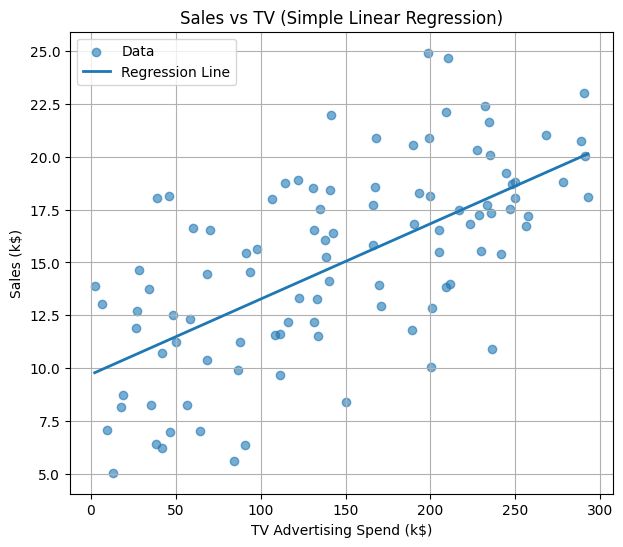

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,6))
plt.scatter(df['TV'], df['Sales'], alpha=0.6, label='Data')
x_line = np.linspace(df['TV'].min(), df['TV'].max(), 200).reshape(-1,1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label='Regression Line')
plt.title('Sales vs TV (Simple Linear Regression)')
plt.xlabel('TV Advertising Spend (k$)')
plt.ylabel('Sales (k$)')
plt.legend()
plt.grid(True)
plt.savefig('/content/sales_vs_tv_regression_100.png', dpi=200, bbox_inches='tight')
print("Saved: /content/sales_vs_tv_regression_100.png")

In [15]:
Xm = df[['TV','Radio','Newspaper']]
ym = df['Sales']

Xtr, Xte, ytr, yte = train_test_split(Xm, ym, test_size=0.2, random_state=42)

m = LinearRegression().fit(Xtr, ytr)
yp = m.predict(Xte)

r2  = r2_score(yte, yp)
mae = mean_absolute_error(yte, yp)
rmse= mean_squared_error(yte, yp)**0.5

print("\nMultiple Regression (Sales ~ TV + Radio + Newspaper)")
print(f"R²={r2:.3f} | MAE={mae:.2f} | RMSE={rmse:.2f}")
print(f"Equation: Sales = {m.intercept_:.2f} + {m.coef_[0]:.4f}*TV + {m.coef_[1]:.4f}*Radio + {m.coef_[2]:.4f}*Newspaper")


Multiple Regression (Sales ~ TV + Radio + Newspaper)
R²=0.810 | MAE=1.67 | RMSE=2.02
Equation: Sales = 3.45 + 0.0412*TV + 0.1945*Radio + 0.0175*Newspaper


Saved: /content/actual_vs_predicted_sales_100.png


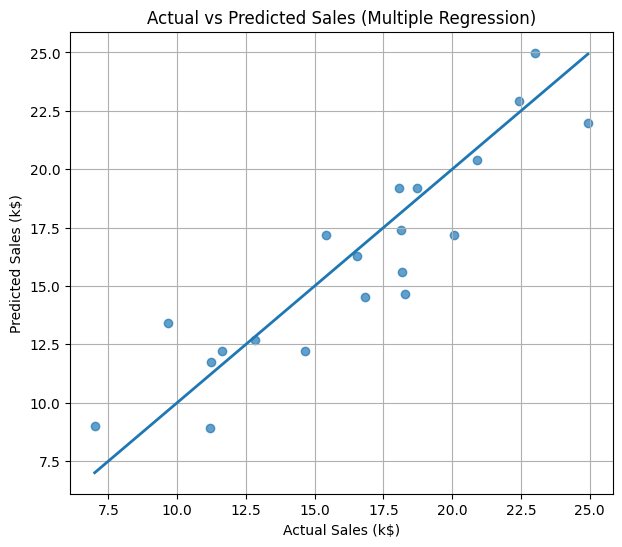

In [16]:
plt.figure(figsize=(7,6))
plt.scatter(yte, yp, alpha=0.7)
plt.plot([yte.min(), yte.max()], [yte.min(), yte.max()], linewidth=2)
plt.title('Actual vs Predicted Sales (Multiple Regression)')
plt.xlabel('Actual Sales (k$)')
plt.ylabel('Predicted Sales (k$)')
plt.grid(True)
plt.savefig('/content/actual_vs_predicted_sales_100.png', dpi=200, bbox_inches='tight')
print("Saved: /content/actual_vs_predicted_sales_100.png")

In [17]:
comparison = pd.DataFrame({
    'TV': Xte['TV'].values,
    'Radio': Xte['Radio'].values,
    'Newspaper': Xte['Newspaper'].values,
    'Actual_Sales': yte.values,
    'Predicted_Sales': np.round(yp, 2)
}).sort_values('Actual_Sales').reset_index(drop=True)

comparison.to_csv('/content/predicted_vs_actual_100.csv', index=False)
comparison.head(10)
print("Saved: /content/predicted_vs_actual_100.csv")

Saved: /content/predicted_vs_actual_100.csv
